In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Step 1: Load and Clean Data
data = pd.read_csv("housing.csv")
data.dropna(inplace=True)
data


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [2]:
#Seeing what the data includes in a simplier format. 
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

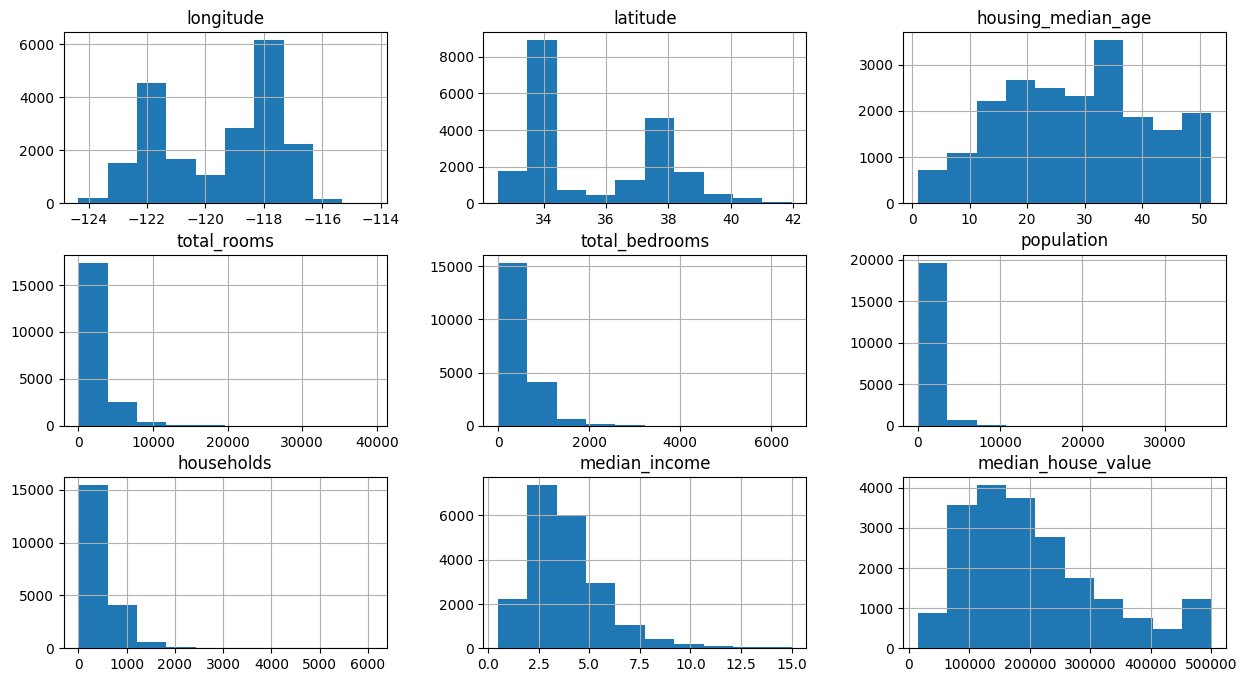

In [3]:
#Getting a histogram to get an understanding of the data. 
data.hist(figsize=(15,8))

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

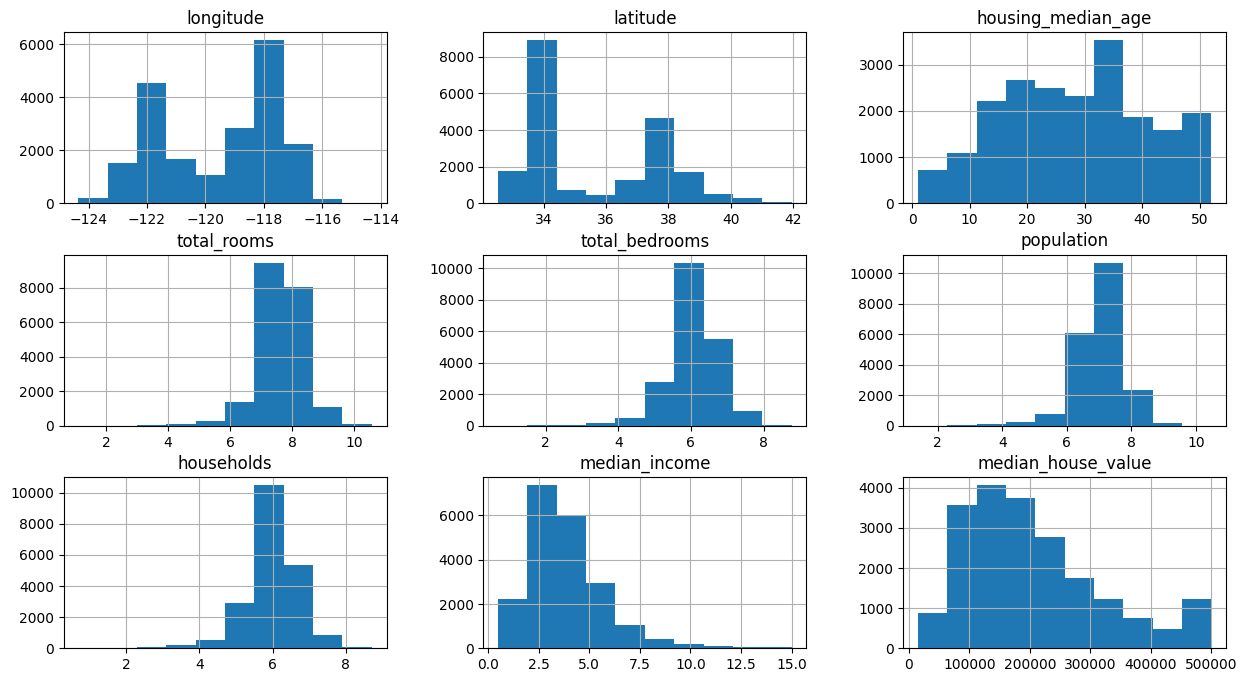

In [4]:
#Log Transformations and historigram (Applying to all data before split)
data['total_rooms'] = np.log(data['total_rooms'] + 1)
data['total_bedrooms'] = np.log(data['total_bedrooms'] + 1)
data['population'] = np.log(data['population'] + 1)
data['households'] = np.log(data['households'] + 1)
#getting the corrected histogram
data.hist(figsize=(15,8))


In [5]:
# Step 3: Feature Engineering - Adding New Features (nice things to know when checking the house prices)
data['rooms_per_household'] = data['total_rooms'] / data['households']
data['population_per_household'] = data['population'] / data['households']
data['bedrooms_per_room'] = data['total_bedrooms'] / data['total_rooms']

<Axes: >

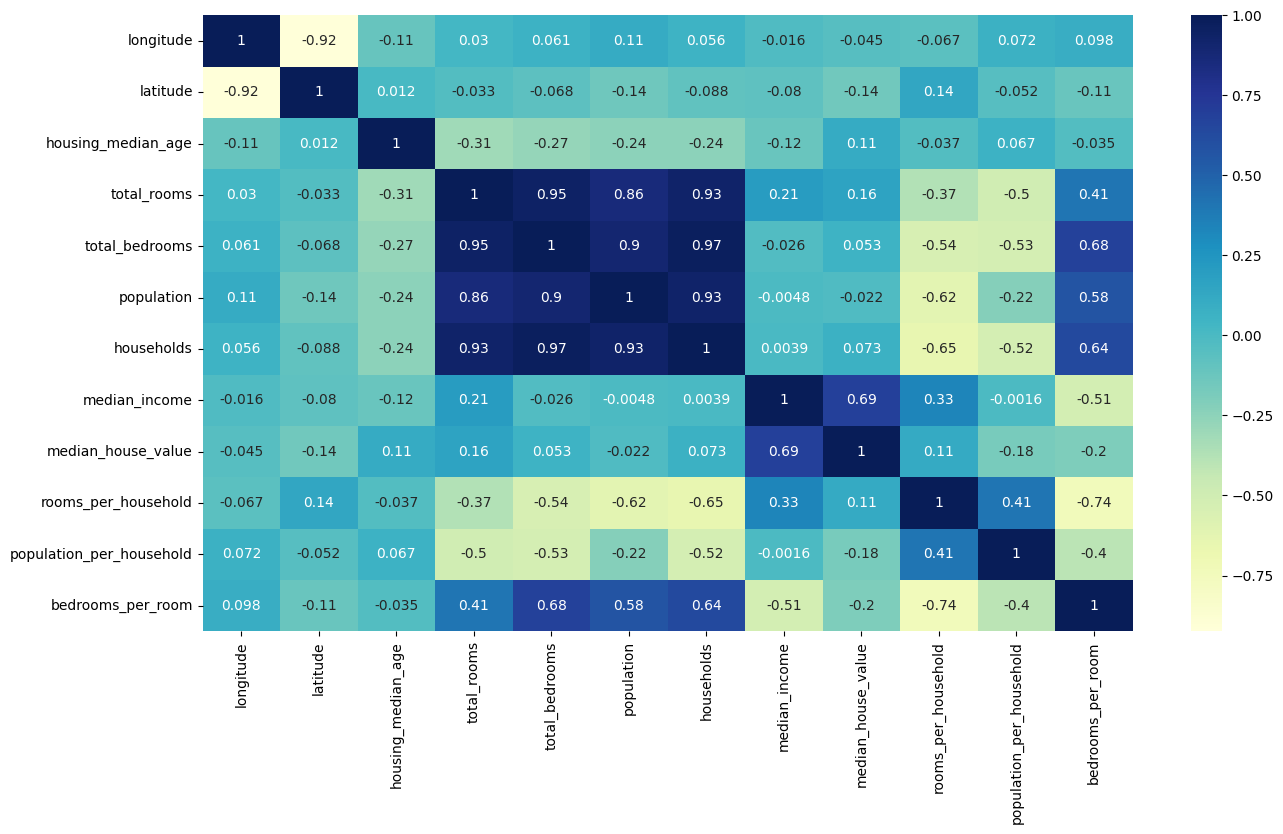

In [6]:
#Getting some basic correlation analysis
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(numeric_only=True),annot=True,cmap="YlGnBu")

<Axes: xlabel='latitude', ylabel='longitude'>

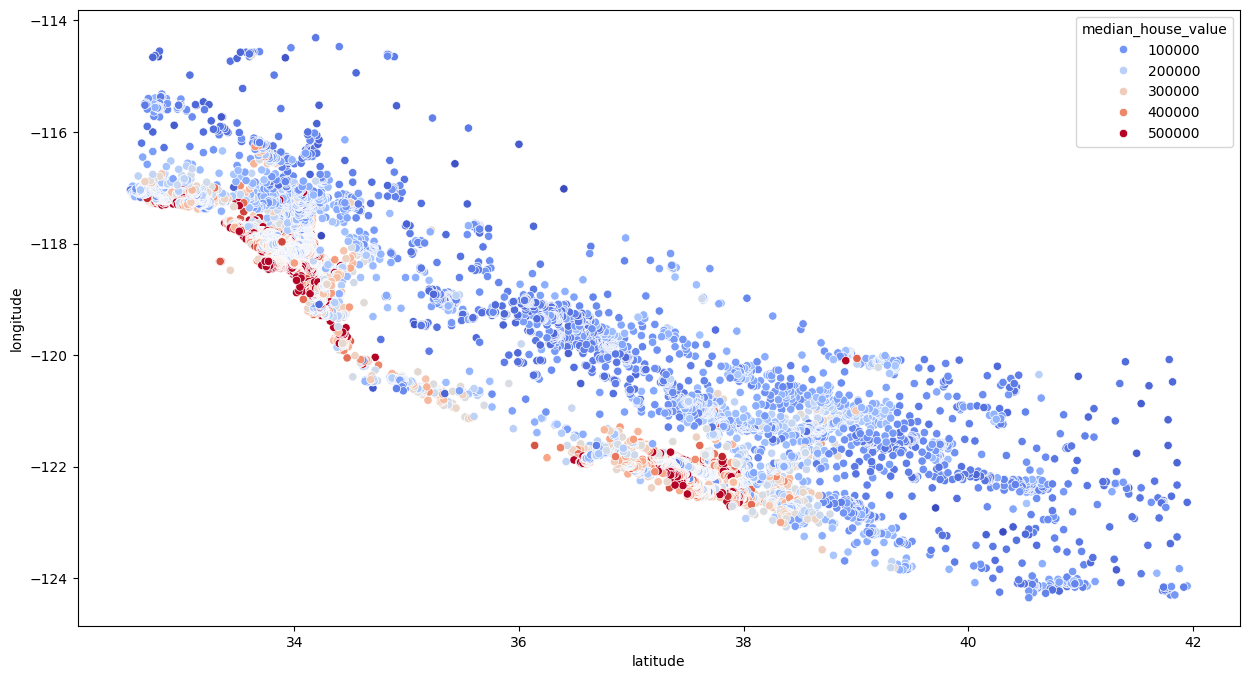

In [7]:
# Fun fact you can actually see how prices increase near the ocean. 
plt.figure(figsize=(15,8))
sns.scatterplot(x="latitude",y='longitude',data=data,hue="median_house_value",palette="coolwarm")

In [8]:
data.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: count, dtype: int64

In [9]:
pd.get_dummies(data.ocean_proximity, dtype=int)

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0
...,...,...,...,...,...
20635,0,1,0,0,0
20636,0,1,0,0,0
20637,0,1,0,0,0
20638,0,1,0,0,0


<Axes: >

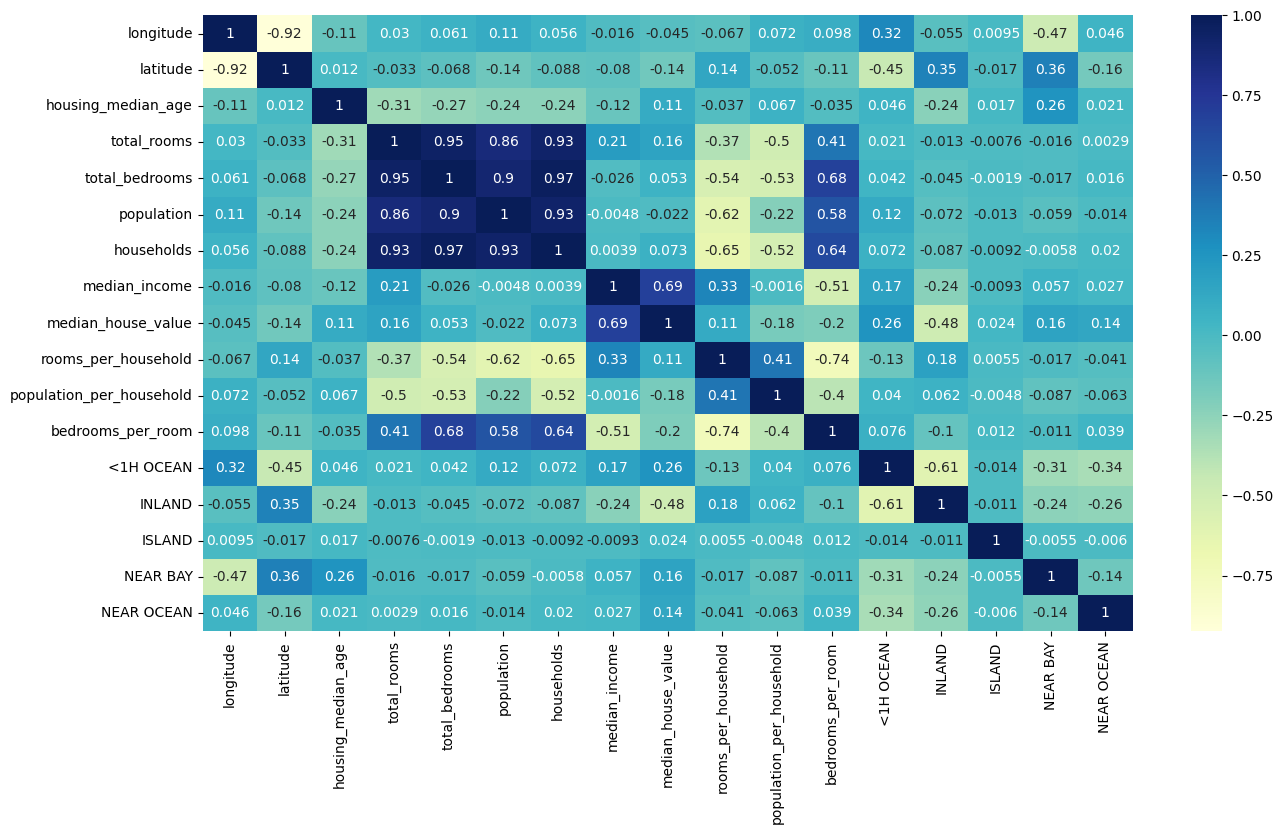

In [10]:
# Step 4: Encoding Categorical Variable related to geographic location
data=data.join(pd.get_dummies(data.ocean_proximity, dtype=int)).drop(['ocean_proximity'],axis=1)
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(numeric_only=True),annot=True,cmap="YlGnBu")

In [11]:
# Optional: Create High Population Density Flag
high_population_threshold = data['population_per_household'].quantile(0.9)
data['is_high_population_density'] = (data['population_per_household'] > high_population_threshold).astype(int)

<Axes: >

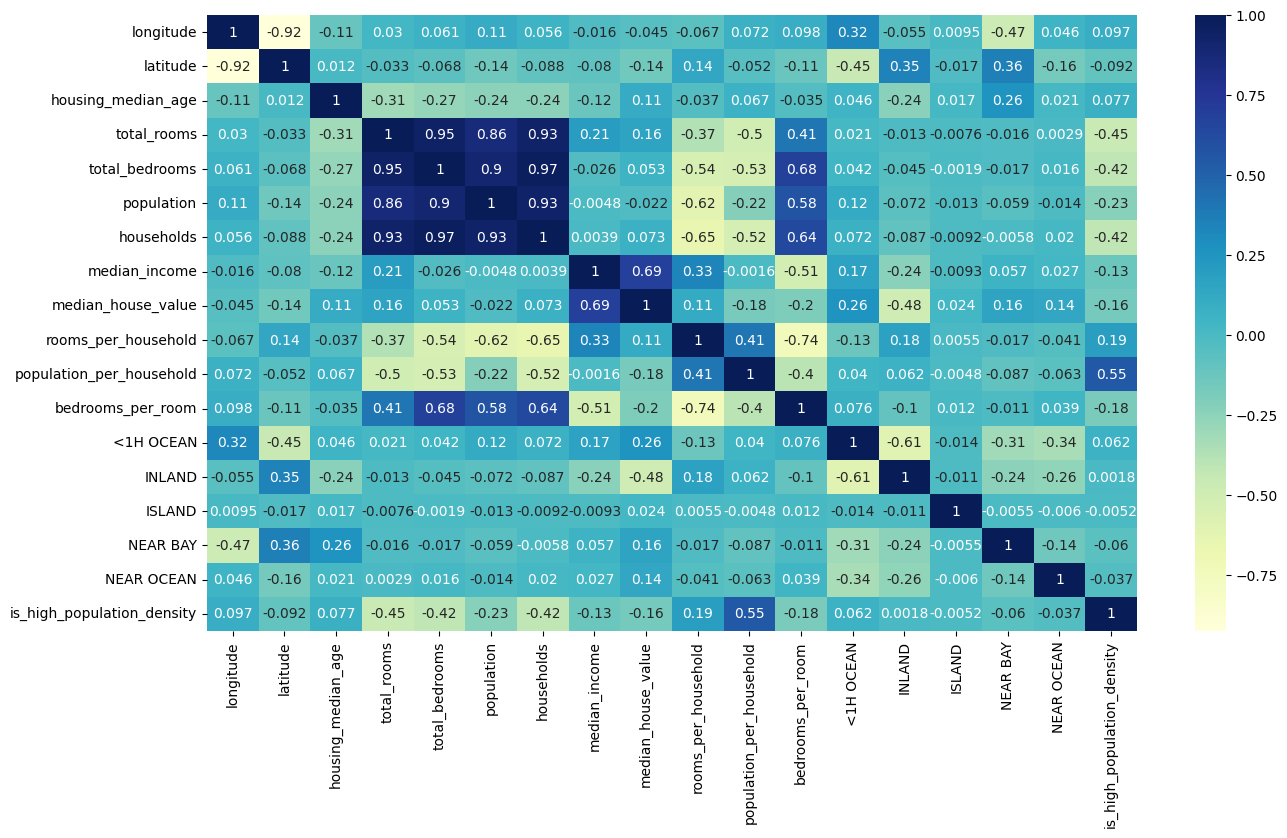

In [12]:
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(numeric_only=True),annot=True,cmap="YlGnBu")

In [13]:
# Step 5: Train-Test Split (After Feature Engineering)
X = data.drop(['median_house_value'], axis=1)
y = data['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:
# Step 6: Scaling (Fit only on Training Data)
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

# Display the transformed training set
X_train_scaled.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,population_per_household,bedrooms_per_room,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,is_high_population_density
0,-1.106514,0.786208,-1.162062,1.021138,1.072038,1.194944,1.118548,0.438412,-0.579417,-0.206565,0.593052,1.122740,-0.678799,-0.013549,-0.35637,-0.385407,-0.333832
1,-0.024671,0.467873,0.348657,-0.912497,-1.172230,-0.807113,-1.128871,-0.242389,0.803822,0.874206,-1.167738,-0.890678,1.473189,-0.013549,-0.35637,-0.385407,2.995522
2,0.758045,-0.711838,-0.287435,0.853398,0.953688,0.679564,0.897560,-0.108969,-0.441475,-0.586873,0.647646,-0.890678,1.473189,-0.013549,-0.35637,-0.385407,-0.333832
3,0.633408,-0.735245,-0.048901,0.187156,1.108851,1.225397,1.123182,-0.861168,-1.751709,-0.170907,2.476178,1.122740,-0.678799,-0.013549,-0.35637,-0.385407,-0.333832
4,1.151895,-1.217429,-0.128412,-0.146861,-0.109579,0.202692,0.029007,-0.168986,-0.367049,0.209370,0.069078,-0.890678,-0.678799,-0.013549,-0.35637,2.594660,-0.333832


Linear Regression - Training RMSE: 65610.46
Linear Regression - Test RMSE: 66823.75
Linear Regression - Training MAE: 47413.02
Linear Regression - Test MAE: 48428.91
Linear Regression - Training R²: 0.67
Linear Regression - Test R²: 0.67


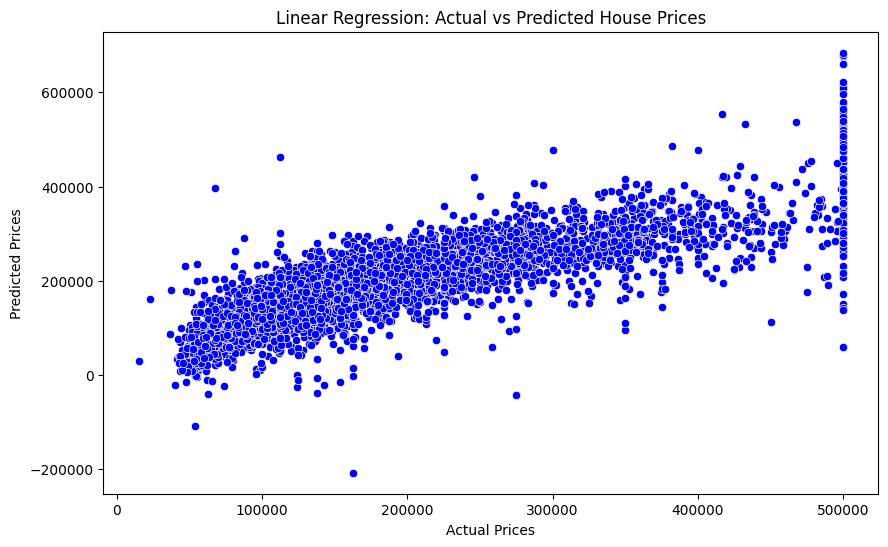

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Step 1: Train a Simple Linear Regression Model
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)

# Step 2: Predict on Training and Test Data
y_train_pred = lin_reg.predict(X_train_scaled)
y_test_pred = lin_reg.predict(X_test_scaled)

# Step 3: Evaluate the Model Performance
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Linear Regression - Training RMSE: {train_rmse:.2f}")
print(f"Linear Regression - Test RMSE: {test_rmse:.2f}")
print(f"Linear Regression - Training MAE: {train_mae:.2f}")
print(f"Linear Regression - Test MAE: {test_mae:.2f}")
print(f"Linear Regression - Training R²: {train_r2:.2f}")
print(f"Linear Regression - Test R²: {test_r2:.2f}")

# Optional: Visualize Predictions vs. Actual Values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_test_pred, color="blue")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Linear Regression: Actual vs Predicted House Prices")
plt.show()


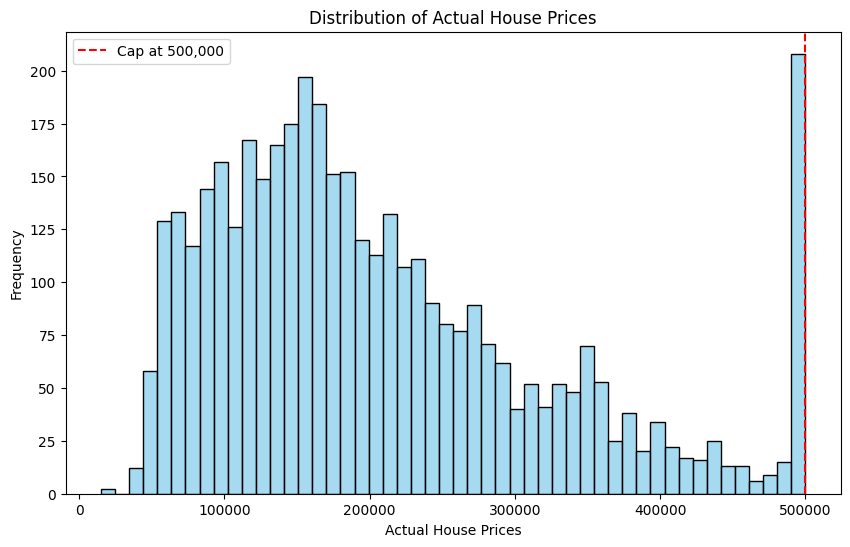

In [16]:
plt.figure(figsize=(10, 6))
sns.histplot(y_test, bins=50, color='skyblue')
plt.xlabel('Actual House Prices')
plt.ylabel('Frequency')
plt.title('Distribution of Actual House Prices')
plt.axvline(500000, color='red', linestyle='--', label='Cap at 500,000')
plt.legend()
plt.show()



Subset 1 - Training RMSE: 57529.69
Subset 1 - Test RMSE: 59339.66
Subset 1 - Training R²: 0.65
Subset 1 - Test R²: 0.64


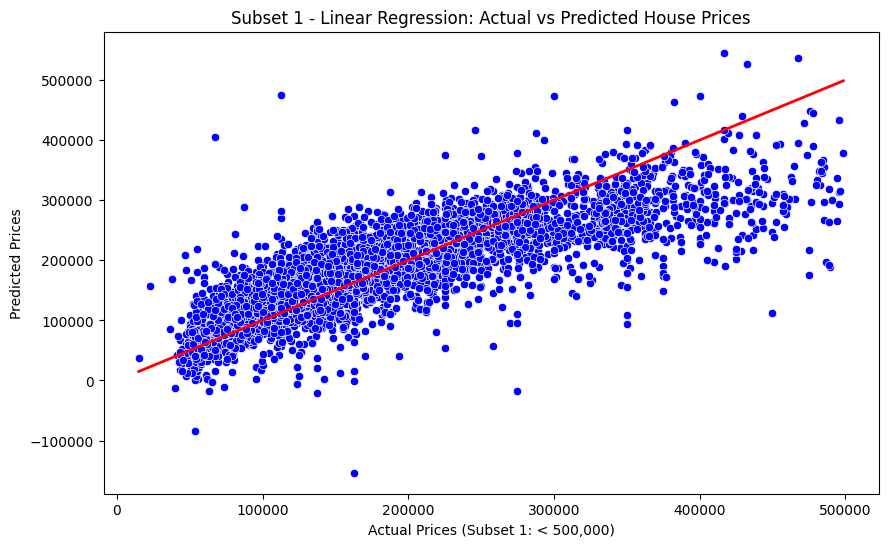

Subset 2 (Capped Data) - Test RMSE: 158640.72
Subset 2 (Capped Data) - Test R²: -652247046642.34


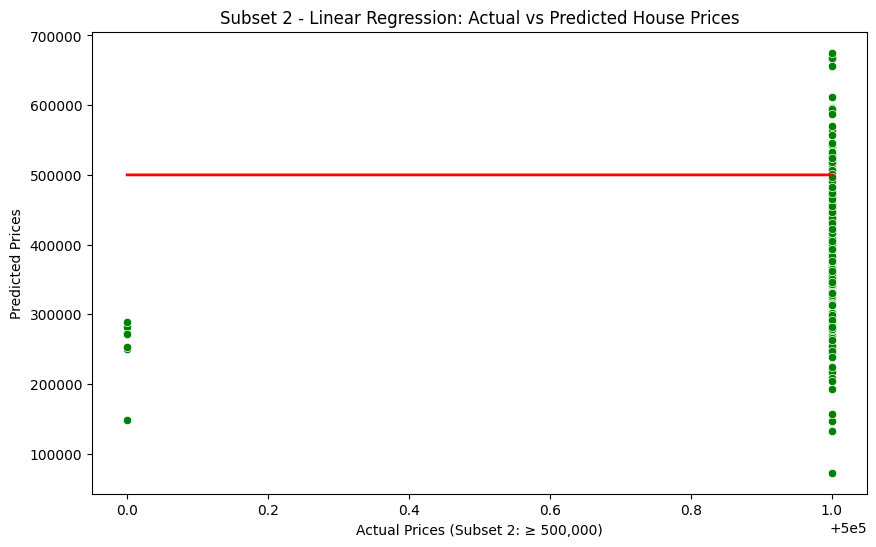

In [17]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Split the data into two subsets based on the target price
# Subset 1: Prices below 500,000
X_train_low = X_train[y_train < 500000]
y_train_low = y_train[y_train < 500000]

X_test_low = X_test[y_test < 500000]
y_test_low = y_test[y_test < 500000]

# Subset 2: Prices equal to or above 500,000
X_train_high = X_train[y_train >= 500000]
y_train_high = y_train[y_train >= 500000]

X_test_high = X_test[y_test >= 500000]
y_test_high = y_test[y_test >= 500000]

# Step 2: Train a Linear Regression Model on Subset 1 (Uncapped data)
lin_reg_low = LinearRegression()
lin_reg_low.fit(X_train_low, y_train_low)

# Step 3: Predict on Subset 1 (Training and Test)
y_train_pred_low = lin_reg_low.predict(X_train_low)
y_test_pred_low = lin_reg_low.predict(X_test_low)

# Step 4: Evaluate Model on Subset 1
train_rmse_low = np.sqrt(mean_squared_error(y_train_low, y_train_pred_low))
test_rmse_low = np.sqrt(mean_squared_error(y_test_low, y_test_pred_low))
train_r2_low = r2_score(y_train_low, y_train_pred_low)
test_r2_low = r2_score(y_test_low, y_test_pred_low)

print(f"Subset 1 - Training RMSE: {train_rmse_low:.2f}")
print(f"Subset 1 - Test RMSE: {test_rmse_low:.2f}")
print(f"Subset 1 - Training R²: {train_r2_low:.2f}")
print(f"Subset 1 - Test R²: {test_r2_low:.2f}")

# Step 5: Visualize Predictions vs. Actual Values for Subset 1
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test_low, y=y_test_pred_low, color="blue")
plt.xlabel("Actual Prices (Subset 1: < 500,000)")
plt.ylabel("Predicted Prices")
plt.title("Subset 1 - Linear Regression: Actual vs Predicted House Prices")
plt.plot([y_test_low.min(), y_test_low.max()], [y_test_low.min(), y_test_low.max()], color='red', lw=2)
plt.show()

# Step 6: Test on Subset 2 (Capped Data)
y_test_pred_high = lin_reg_low.predict(X_test_high)

# Evaluate the model on Subset 2
test_rmse_high = np.sqrt(mean_squared_error(y_test_high, y_test_pred_high))
test_r2_high = r2_score(y_test_high, y_test_pred_high)

print(f"Subset 2 (Capped Data) - Test RMSE: {test_rmse_high:.2f}")
print(f"Subset 2 (Capped Data) - Test R²: {test_r2_high:.2f}")

# Step 7: Visualize Predictions vs. Actual Values for Subset 2
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test_high, y=y_test_pred_high, color="green")
plt.xlabel("Actual Prices (Subset 2: ≥ 500,000)")
plt.ylabel("Predicted Prices")
plt.title("Subset 2 - Linear Regression: Actual vs Predicted House Prices")
plt.plot([y_test_high.min(), y_test_high.max()], [y_test_high.min(), y_test_high.max()], color='red', lw=2)
plt.show()


Subset 1 - Training RMSE: 57837.36
Subset 1 - Test RMSE: 58079.63
Subset 1 - Training R²: 0.64
Subset 1 - Test R²: 0.65


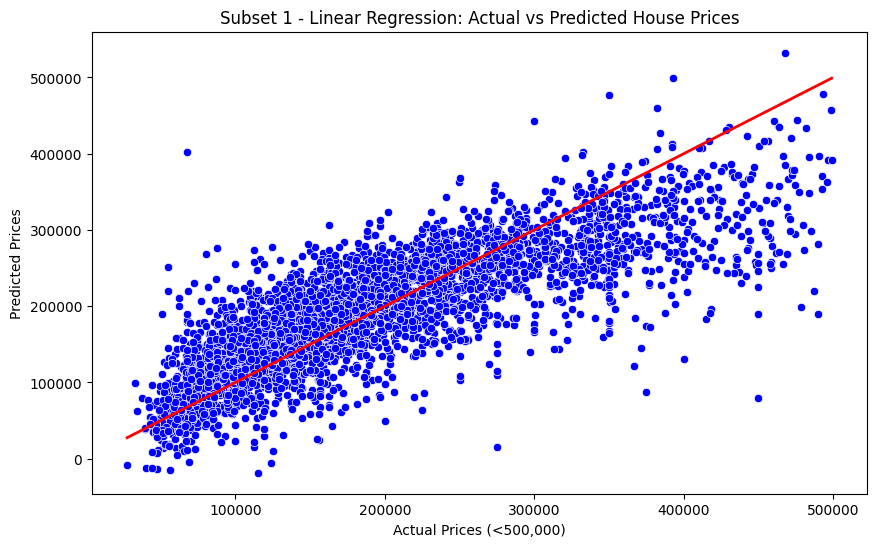

In [18]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Filter Subset 1 (Only Include Prices Below 500,000)
X_subset1 = X[y < 500000]
y_subset1 = y[y < 500000]

# Step 2: Split Subset 1 into Train and Test Sets
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_subset1, y_subset1, test_size=0.2, random_state=42)

# Step 3: Train Linear Regression Model on Subset 1
lin_reg_1 = LinearRegression()
lin_reg_1.fit(X_train_1, y_train_1)

# Step 4: Predict on Training and Test Data for Subset 1
y_train_pred_1 = lin_reg_1.predict(X_train_1)
y_test_pred_1 = lin_reg_1.predict(X_test_1)

# Step 5: Evaluate Model Performance on Subset 1
train_rmse_1 = np.sqrt(mean_squared_error(y_train_1, y_train_pred_1))
test_rmse_1 = np.sqrt(mean_squared_error(y_test_1, y_test_pred_1))
train_r2_1 = r2_score(y_train_1, y_train_pred_1)
test_r2_1 = r2_score(y_test_1, y_test_pred_1)

print(f"Subset 1 - Training RMSE: {train_rmse_1:.2f}")
print(f"Subset 1 - Test RMSE: {test_rmse_1:.2f}")
print(f"Subset 1 - Training R²: {train_r2_1:.2f}")
print(f"Subset 1 - Test R²: {test_r2_1:.2f}")

# Step 6: Visualize Predictions vs. Actual Values for Subset 1
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test_1, y=y_test_pred_1, color="blue")
plt.xlabel("Actual Prices (<500,000)")
plt.ylabel("Predicted Prices")
plt.title("Subset 1 - Linear Regression: Actual vs Predicted House Prices")
plt.plot([y_test_1.min(), y_test_1.max()], [y_test_1.min(), y_test_1.max()], color='red', lw=2)  # Add diagonal line for perfect prediction
plt.show()


In [19]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Define Ridge Regression Model
ridge = Ridge()

# Define Hyperparameters to Tune
parameters = {'alpha': [0.1, 1.0, 10.0, 100.0, 1000.0]}

# Apply GridSearchCV for Hyperparameter Tuning
ridge_cv = GridSearchCV(ridge, param_grid=parameters, cv=5)
ridge_cv.fit(X_train_low, y_train_low)

# Predict using the Best Model
y_train_pred_ridge = ridge_cv.predict(X_train_low)
y_test_pred_ridge = ridge_cv.predict(X_test_low)

# Evaluate the Ridge Model
train_rmse_ridge = np.sqrt(mean_squared_error(y_train_low, y_train_pred_ridge))
test_rmse_ridge = np.sqrt(mean_squared_error(y_test_low, y_test_pred_ridge))
train_r2_ridge = r2_score(y_train_low, y_train_pred_ridge)
test_r2_ridge = r2_score(y_test_low, y_test_pred_ridge)

print(f"Ridge Regression - Training RMSE: {train_rmse_ridge:.2f}")
print(f"Ridge Regression - Test RMSE: {test_rmse_ridge:.2f}")
print(f"Ridge Regression - Training R²: {train_r2_ridge:.2f}")
print(f"Ridge Regression - Test R²: {test_r2_ridge:.2f}")


Ridge Regression - Training RMSE: 57546.80
Ridge Regression - Test RMSE: 59233.30
Ridge Regression - Training R²: 0.65
Ridge Regression - Test R²: 0.64


Random Forest - Training RMSE: 16802.66
Random Forest - Test RMSE: 45816.22
Random Forest - Training R²: 0.97
Random Forest - Test R²: 0.79


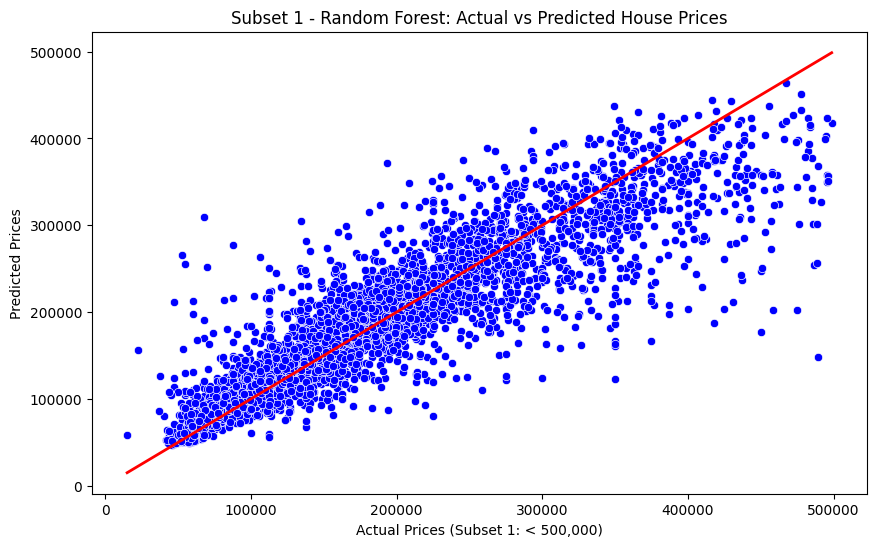

In [20]:
from sklearn.ensemble import RandomForestRegressor

# Step 1: Define the Random Forest Model
rf_reg = RandomForestRegressor(random_state=42)

# Step 2: Train the Model on Subset 1
rf_reg.fit(X_train_low, y_train_low)

# Step 3: Predict on Training and Test Data
y_train_pred_rf = rf_reg.predict(X_train_low)
y_test_pred_rf = rf_reg.predict(X_test_low)

# Step 4: Evaluate the Model Performance
train_rmse_rf = np.sqrt(mean_squared_error(y_train_low, y_train_pred_rf))
test_rmse_rf = np.sqrt(mean_squared_error(y_test_low, y_test_pred_rf))
train_r2_rf = r2_score(y_train_low, y_train_pred_rf)
test_r2_rf = r2_score(y_test_low, y_test_pred_rf)

print(f"Random Forest - Training RMSE: {train_rmse_rf:.2f}")
print(f"Random Forest - Test RMSE: {test_rmse_rf:.2f}")
print(f"Random Forest - Training R²: {train_r2_rf:.2f}")
print(f"Random Forest - Test R²: {test_r2_rf:.2f}")

# Step 5: Visualize Predictions vs. Actual Values for Random Forest
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test_low, y=y_test_pred_rf, color="blue")
plt.xlabel("Actual Prices (Subset 1: < 500,000)")
plt.ylabel("Predicted Prices")
plt.title("Subset 1 - Random Forest: Actual vs Predicted House Prices")
plt.plot([y_test_low.min(), y_test_low.max()], [y_test_low.min(), y_test_low.max()], color='red', lw=2)
plt.show()


In [27]:
import joblib

# Step 1: Define the Random Forest Model
rf_reg = RandomForestRegressor(random_state=42)

# Step 2: Train the Model on Subset 1
rf_reg.fit(X_train_low, y_train_low)

# Step 3: Save the model and feature names
model_data = {
    'model': rf_reg,
    'feature_names': X_train_low.columns.tolist()  # Save the feature names as a list
}

# Save the model and feature names
joblib.dump(model_data, 'house_forest_model_with_features.pkl')

print("Model and feature names saved successfully as 'house_forest_model_with_features.pkl'.")



Model and feature names saved successfully as 'house_forest_model_with_features.pkl'.
